#  Практическое задание №1 по ОММ                                   
### Адонин Артем Сергеевич 303 группа
## Задача № 12

# 1. Постановка задачи

Используя схему бегущего счёта и итерационные методы, решить задачу:


\begin{equation}
\begin{cases}
\frac{\partial u}{\partial t} - \frac{2e^{2u}}{1+e^{2u}} \cdot \frac{\partial u}{\partial x} = 0, \; -1\leq x< 0, \\
u(x, 0) = sinπx, \\
u(0, t) = 0.
\end{cases}
\end{equation}

#  2. Анализ задачи
## 1)Построение характеристик

Cоставим уравнения характеристик и посмотрим, будут ли они пересекаться:
\begin{equation}
\frac{dt}{1} = - \frac{1+e^{2u}}{2e^{2u}} \cdot \frac{dx}{1}=\frac{du}{0}
\end{equation}

Получим систему уравнения:

\begin{equation}
\begin{cases}
u=const \\
\frac{dx}{dt}=-\frac{2e^{2u}}{1+e^{2u}}.
\end{cases}
\end{equation}

Интегрируя,получим:

\begin{equation}
x - x_0 =  - (t - t_0)\frac{2e^{2u}}{1+e^{2u}}
\end{equation}

Получим семейство кривых:

   Для $t_0$ = 0 и u=sin(πx):  $t = - (x - x_0)\frac{1+e^{2sin(πx_0)}}{2e^{2sin(πx_0)}}$
   
   Для $x_0$ = 0 и u=0: $t = t_0 - x$
   

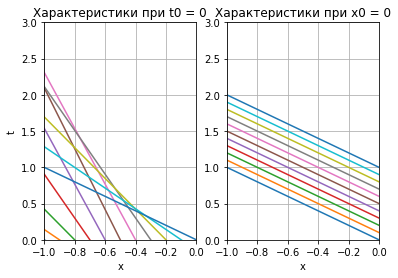

In [40]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
#  для t0 = 0
def char1(x):
    return [-(x - x0) * (1. + np.exp(2. * np.sin(np.pi * x0)))/(2. * np.exp(2. * np.sin(np.pi * x0)))  for x0 in np.arange(-1., 0.1, 0.1)]

#  для x0 = 0
def char2(x):
    return [t0 - x for t0 in np.arange(0, 1.1, 0.1)]

# Так как x принадлежит [-1; 0), создадим массив
x_arr = np.arange(-1, 0.1, 0.1)

# Передадим массив в функции, отвечающие за характеристики
char1_arr = [char1(x) for x in x_arr]
char2_arr = [char2(x) for x in x_arr]

plt.subplot(1, 2, 1)
plt.ylim(0,3)
plt.xlim(-1,0)
plt.plot(x_arr, char1_arr) 
plt.title('Характеристики при t0 = 0')
plt.ylabel('t')
plt.xlabel('x')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.ylim(0,3)
plt.xlim(-1,0)
plt.plot(x_arr, char2_arr)
plt.title('Характеристики при x0 = 0')
plt.xlabel('x')
plt.grid(True)
plt.show()

## 2)Решение при помощи численных методов
## 2.1Построение разностной схемы:
Приведем уравнение
\begin{equation}
\frac{\partial u}{\partial t} - \frac{2e^{2u}}{1+e^{2u}} \cdot \frac{\partial u}{\partial x} = 0, \; -1\leq x< 0,
\end{equation}
к виду
\begin{equation}
\frac{\partial u}{\partial t} - \frac{\partial F(u)}{\partial x} = 0, \; -1\leq x< 0,
\end{equation}
\begin{equation}
\frac{\partial u}{\partial t} - F'(u)\frac{\partial u}{\partial x} = 0, \; -1\leq x< 0,
\end{equation}
тогда 
\begin{equation}
F'(u)=-\frac{2e^{2u}}{1+e^{2u}}
\end{equation}
\begin{equation}
F(u)=-ln(e^{2u}+1)+const
\end{equation}


 Введем сетку с шагом $h$ по $x$ и шагом $\tau$ по $t$,$N$ и $M$ число узлов соответсвенно в области $\Omega$ = {$(x, t): -1 \leq x < 0, 0 < t  \leq 1,5$}:
\begin{equation}
\omega_{h,\tau} = 
    \begin{cases}
    x_n = n \cdot h, h = \frac{1}{N-1}, n = \overline{0, N-1}\\
    t_m = m \cdot \tau, \tau = \frac{1}{M-1}, m = \overline{0, M-1}
    \end{cases}
\end{equation}

Введем сеточные функции: $y_n^m = u(x_n, t_m)$ и $F_n^m = F(y_n^m) = -ln(e^{2y_n^m}+1)$


Для данной задачи в рассматриваемой области будем использовать четырёхточечный шаблон.

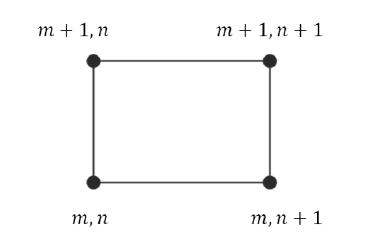